In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [92]:
# Two types of distribution functions: Normal distribution (N), Continuous uniform distribution (U)
# Student ID: 40340112032
# First button           N(2, 1)
# Second button          N(0, 2)
# Third button           N(-1, 1)
# Fourth button          N(3, 1) OR U(-3, 1)

def get_action(button=0):
    button += 1
    match button:
        case 1:
            return np.random.normal(loc=2, scale=1)
        case 2:
            return np.random.normal(loc=0, scale=2)
        case 3:
            return np.random.normal(loc=-1, scale=1)
        case 4:
            p = np.random.rand()
            if p > .3:
                return np.random.normal(loc=3, scale=2)
            else:
                return np.random.uniform(low=-3, high=1)
        case _:
            raise Exception(f"Sorry button should be between 1 and 4. You gave {button}")

In [45]:
get_action(4)

5.3477722652742

In [46]:
np.zeros(4)

array([0., 0., 0., 0.])

In [166]:
def runn(N=4000, eps=0.2, plot=True):

    button_use = {0:0, 1:0, 2:0, 3:0}
    button_scores = np.zeros(4)
    
    data = np.zeros(N) 
        
    for i in range(N): 
        p = np.random.random() 
        if p < eps: 
            j = np.random.choice(4)
        else: 
            j = np.argmax(button_scores)
        x = get_action(j)
        button_scores[j] = ((button_scores[j] * button_use[j]) + x) / (button_use[j] + 1)
        button_use[j]+=1
        
        data[i] = x 
        
    best_button = np.argmax(button_scores)
    best_score = button_scores[best_button]
    # print(f'The best button is: {best_button+1} with score: {best_score}')
    
    cum_mean = np.cumsum(data) / (np.arange(N) + 1) 
    if plot:
        plt.plot(cum_mean)
        plt.title(f'N={N} | Epsilon={eps}')
        plt.plot(button_scores[0]) 
        plt.plot(button_scores[1]) 
        plt.plot(button_scores[2]) 
        plt.plot(button_scores[3])
        plt.show()
    
    return best_score 

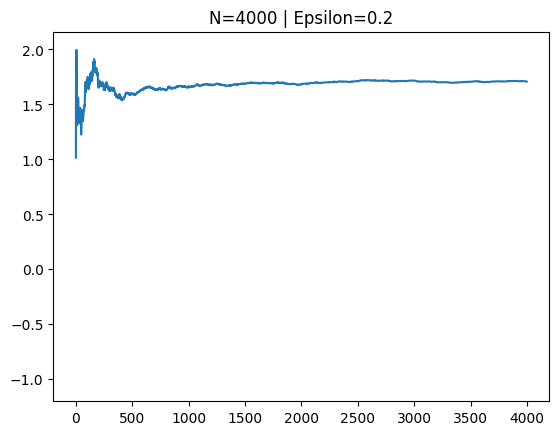

In [167]:
runn();

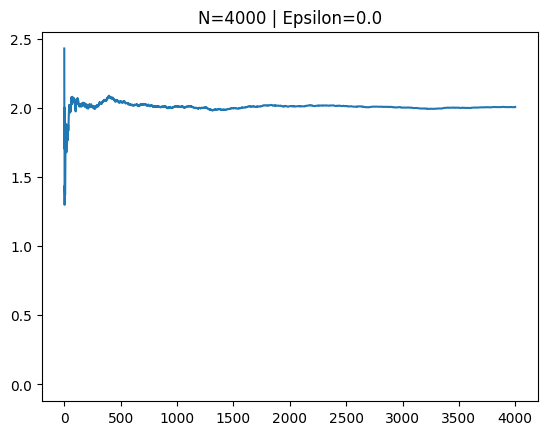

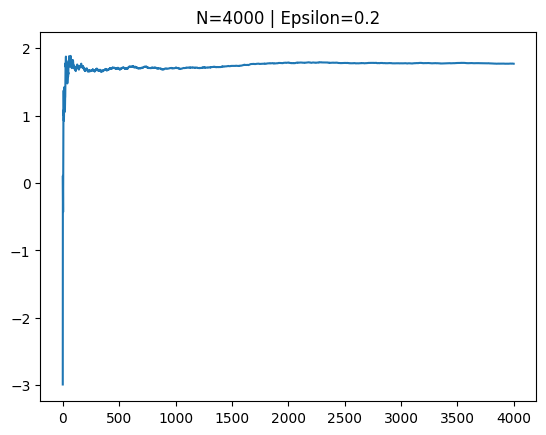

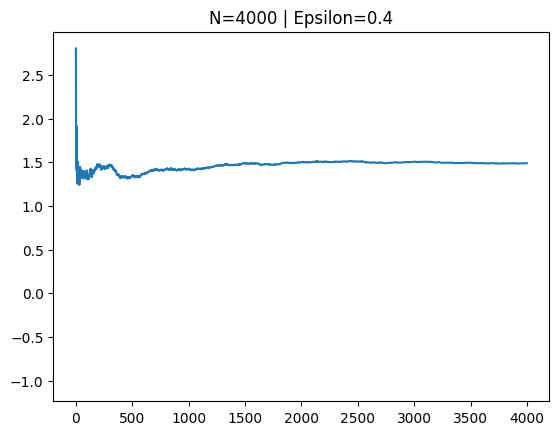

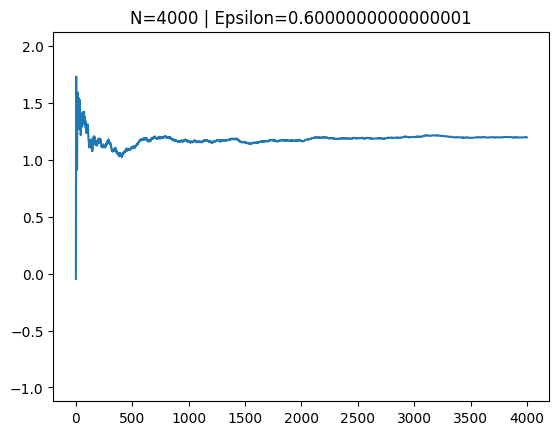

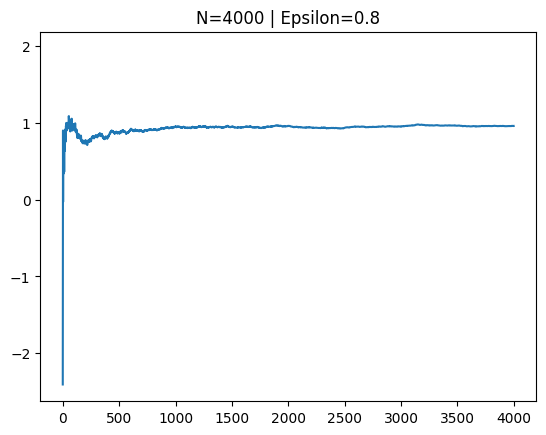

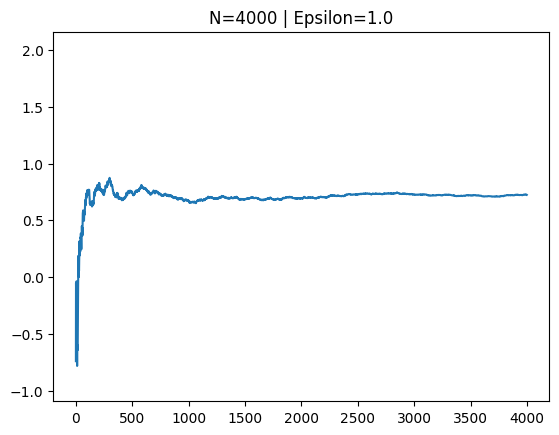

Best score yet: 2.020132834832023 with eps: 0.4


In [182]:
epsilon_lists = np.linspace(0, 1, 6)
score = 0
best_eps = 0
for i in epsilon_lists:
    n = runn(eps=i)
    if n > score:
        score = n
        best_eps = i

print(f'Best score yet: {score} with eps: {best_eps}')

In [188]:
def runn_alpha_beta(N=4000, eps=0.2, alpha = 1, beta = 1, plot=True):

    button_use = {0:0, 1:0, 2:0, 3:0}
    button_scores = np.zeros(4)
    
    data = np.zeros(N) 
        
    for i in range(N): 
        p = np.random.random() 
        if p < eps: 
            j = np.random.choice(4)
        else: 
            j = np.argmax(button_scores)
        x = get_action(j)
        if x >= 0:
            x *= alpha
        else:
            x *= beta
        button_scores[j] = ((button_scores[j] * button_use[j]) + x) / (button_use[j] + 1)
        button_use[j]+=1
        
        data[i] = x 
        
    best_button = np.argmax(button_scores)
    best_score = button_scores[best_button]
    # print(f'The best button is: {best_button+1} with score: {best_score}')
    
    cum_mean = np.cumsum(data) / (np.arange(N) + 1) 
    if plot:
        plt.plot(cum_mean)
        plt.title(f'N={N} | Epsilon={eps} | Alpha={alpha} | Beta={beta} | Button={best_button}')
        plt.plot(button_scores[0]) 
        plt.plot(button_scores[1]) 
        plt.plot(button_scores[2]) 
        plt.plot(button_scores[3])
        plt.show()
    
    return best_score 

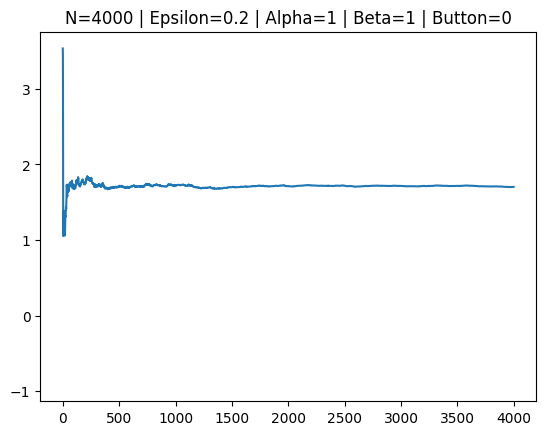

1.992251295236891

In [189]:
runn_alpha_beta()

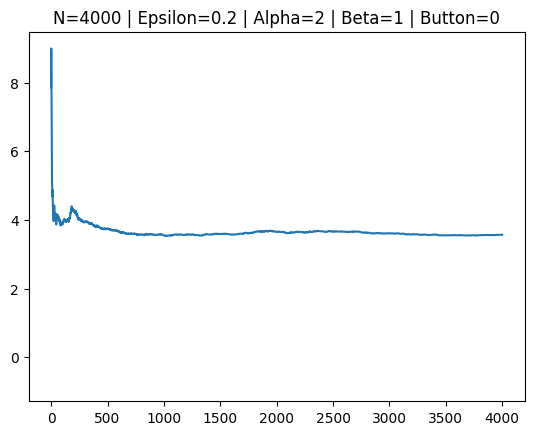

4.00910294941045

In [190]:
runn_alpha_beta(alpha=2, beta=1)

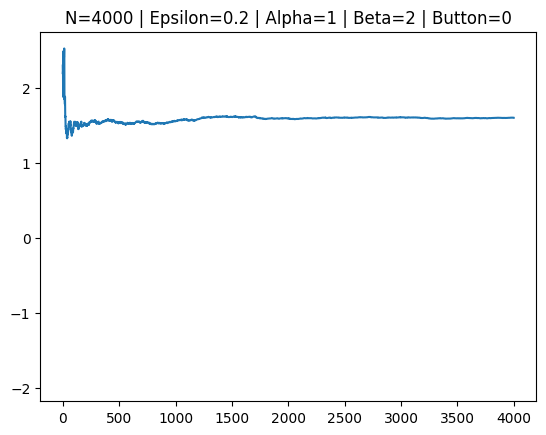

1.9882182402910493

In [191]:
runn_alpha_beta(alpha=1, beta=2)

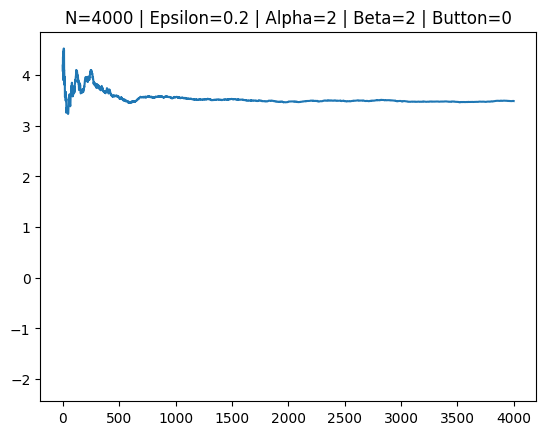

3.998407848220583

In [192]:
runn_alpha_beta(alpha=2, beta=2)